In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='2'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

import sys
sys.path.append('/home/bis/2021_SJH_detectability/DbyDeep')
from RefModel.model_DeepMSpeptide import load_pep_and_codify

In [2]:
print('Loading model...')
model_2_1D = keras.models.load_model('/home/bis/2021_SJH_detectability/DbyDeep/RefModel/2019Bioinformatics_DeepMSPeptide/DeepMSPeptide/model_2_1D.h5')
# retrained

Loading model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
df_massive=pd.read_csv('/data/2021_SJH_detectability/data_human/train.csv')
df_hpp=pd.read_csv('/data/2021_SJH_detectability/data_human/HPP.csv')
df_merge=pd.DataFrame(np.concatenate([df_massive.peptide.unique(), df_hpp.peptide.unique()]), columns=['peptide'])
df_merge['Drop']=True

# Cross species : Mouse

Loading input peptides
Succesfully loaded 1294207 peptides and skipped 0
1294207/1294207 [==============================] - 302s 233us/sample - loss: 3.3098 - acc: 0.2749 - binary_crossentropy: 3.3098
Test Accuracy: [3.3098268206503247, 0.27490038, 3.3098187]
Test AUC : 0.8625419165579195
              precision    recall  f1-score   support

       False     0.9942    0.7184    0.8341   1245028
        True     0.1115    0.8942    0.1982     49179

    accuracy                         0.7251   1294207
   macro avg     0.5528    0.8063    0.5162   1294207
weighted avg     0.9607    0.7251    0.8099   1294207



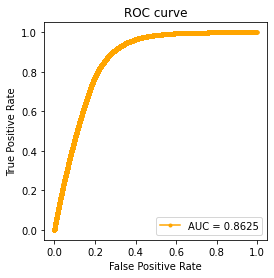

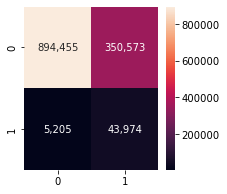

In [10]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/KLife/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/KLife/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_KLife_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_mouse_KLife_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_mouse_KLife_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_mouse_KLife_DeepMSpeptide_prob.npy', probs)
np.save('log/result_mouse_KLife_DeepMSpeptide_true.npy', y_test)

Loading input peptides
Succesfully loaded 1127006 peptides and skipped 0
1127006/1127006 [==============================] - 276s 245us/sample - loss: 3.2751 - acc: 0.2798 - binary_crossentropy: 3.2751
Test Accuracy: [3.275124556052303, 0.27983525, 3.2751231]
Test AUC : 0.8375819938856793
              precision    recall  f1-score   support

       False     0.9908    0.7152    0.8307   1082017
        True     0.1092    0.8397    0.1933     44989

    accuracy                         0.7202   1127006
   macro avg     0.5500    0.7774    0.5120   1127006
weighted avg     0.9556    0.7202    0.8053   1127006



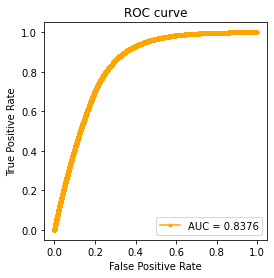

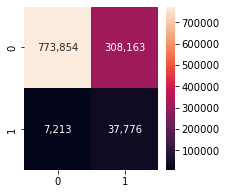

In [11]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/SkeletaMuscle/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/SkeletaMuscle/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_prob.npy', probs)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_true.npy', y_test)

# Cross species : Human

Loading input peptides
Succesfully loaded 1400233 peptides and skipped 0
Test AUC : 0.831425079563499
              precision    recall  f1-score   support

       False     0.9902    0.7456    0.8506   1353817
        True     0.0956    0.7844    0.1704     46416

    accuracy                         0.7468   1400233
   macro avg     0.5429    0.7650    0.5105   1400233
weighted avg     0.9605    0.7468    0.8281   1400233



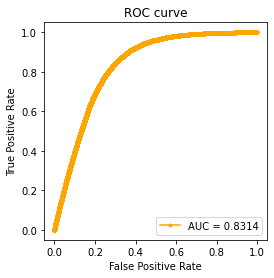

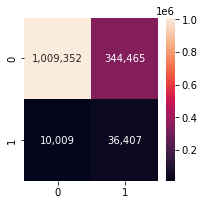

In [12]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HEK293/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HEK293/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i >= 0.5 else 0 for i in probs]
# acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
# print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HEK293_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_human_HEK293_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_human_HEK293_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_human_HEK293_DeepMSpeptide_prob.npy', probs)
np.save('log/result_human_HEK293_DeepMSpeptide_true.npy', y_test)

Loading input peptides
Succesfully loaded 1011246 peptides and skipped 0
Test AUC : 0.8295632731482132
              precision    recall  f1-score   support

       False     0.9948    0.7375    0.8470    993639
        True     0.0501    0.7812    0.0941     17607

    accuracy                         0.7382   1011246
   macro avg     0.5224    0.7593    0.4706   1011246
weighted avg     0.9783    0.7382    0.8339   1011246



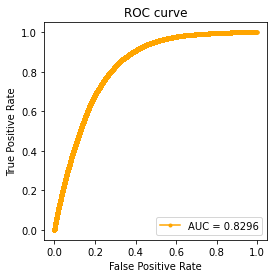

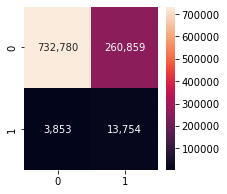

In [13]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HmapLiver/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HmapLiver/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i >= 0.5 else 0 for i in probs]
# acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
# print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HmapLiver_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_human_HmapLiver_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_human_HmapLiver_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_human_HmapLiver_DeepMSpeptide_prob.npy', probs)
np.save('log/result_human_HmapLiver_DeepMSpeptide_true.npy', y_test)

# Yeast

Loading input peptides
Succesfully loaded 553772 peptides and skipped 0
553772/553772 [==============================] - 113s 204us/sample - loss: 2.9592 - acc: 0.3165 - binary_crossentropy: 2.9592
Test Accuracy: [2.959174943940014, 0.31648764, 2.959183]
Test AUC : 0.8086083700214877
              precision    recall  f1-score   support

       False     0.9837    0.6747    0.8004    520802
        True     0.1380    0.8229    0.2364     32970

    accuracy                         0.6835    553772
   macro avg     0.5608    0.7488    0.5184    553772
weighted avg     0.9333    0.6835    0.7668    553772



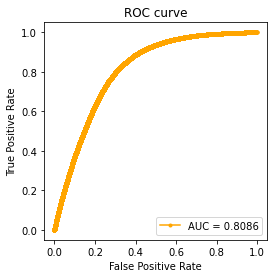

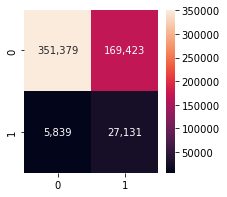

In [14]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/DelPBP1/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/DelPBP1/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_DelPBP1_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_prob.npy', probs)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_true.npy', y_test)

Loading input peptides
Succesfully loaded 639915 peptides and skipped 0
639915/639915 [==============================] - 127s 199us/sample - loss: 3.0768 - acc: 0.2597 - binary_crossentropy: 3.0768
Test Accuracy: [3.0767742654262964, 0.25973606, 3.0767732]
Test AUC : 0.8573292635471582
              precision    recall  f1-score   support

       False     0.9770    0.7211    0.8298    561767
        True     0.3046    0.8782    0.4523     78148

    accuracy                         0.7403    639915
   macro avg     0.6408    0.7997    0.6410    639915
weighted avg     0.8949    0.7403    0.7837    639915



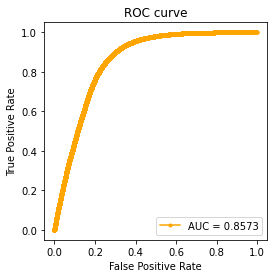

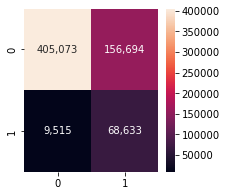

In [15]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/KLife/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/KLife/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_KLife_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_yeast_KLife_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_yeast_KLife_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_yeast_KLife_DeepMSpeptide_prob.npy', probs)
np.save('log/result_yeast_KLife_DeepMSpeptide_true.npy', y_test)